<a href="https://colab.research.google.com/github/alla2001/G-Tact/blob/main/main_junction_axios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import shutil

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sudarshanvaidya/random-images-for-face-emotion-recognition

 96% 44.0M/45.6M [00:00<00:00, 58.3MB/s]
100% 45.6M/45.6M [00:00<00:00, 56.8MB/s]


In [ ]:
!ls

sample_data


In [ ]:
class_list = ["happiness","anger" , "neutrality"]
os.mkdir("./images")
for class_dir in os.listdir('./'):
  print(class_dir)

In [ ]:
!unzip random-images-for-face-emotion-recognition.zip 

Streaming output truncated to the last 5000 lines.
  inflating: anger/images - 2020-11-06T004641.075_face.png  
  inflating: anger/images - 2020-11-06T004643.968_face.png  
  inflating: anger/images - 2020-11-06T004647.970_face.png  
  inflating: anger/images - 2020-11-06T004648.686_face.png  
  inflating: anger/images - 2020-11-06T004655.143_face.png  
  inflating: anger/images - 2020-11-06T004659.853_face.png  
  inflating: anger/images - 2020-11-06T004703.467_face.png  
  inflating: anger/images - 2020-11-06T004714.287_face.png  
  inflating: anger/images - 2020-11-06T004717.427_face.png  
  inflating: anger/images - 2020-11-06T004717.820_face.png  
  inflating: anger/images - 2020-11-06T004720.711_face.png  
  inflating: anger/images - 2020-11-06T004722.599_face.png  
  inflating: anger/images - 2020-11-06T004728.732_face.png  
  inflating: anger/images - 2020-11-06T004738.914_face.png  
  inflating: anger/images - 2020-11-06T004739.991_face.png  
  inflating: anger/images - 2020-1

In [ ]:
for class_dir in os.listdir('./'):
  if(class_dir in class_list):
    os.rename(class_dir, 'images/'+class_dir)


In [ ]:
for class_dir in os.listdir('./images'):
  print(class_dir)

anger
neutrality
happiness


In [ ]:
os.mkdir("./train")
os.mkdir("./test")

In [ ]:
for class_dir in os.listdir('images'):
  if(class_dir != ".ipynb_checkpoints"):
    os.mkdir('./train/'+class_dir)
    os.mkdir('./test/'+class_dir)

In [ ]:
for class_dir in os.listdir('images'):
  print(class_dir, len(os.listdir('images/'+class_dir)), int(len(os.listdir('images/'+class_dir))*0.2))

anger 890 178
neutrality 524 104
happiness 1406 281


In [ ]:
for class_dir in os.listdir('images'):
  limit = int(len(os.listdir('images/'+class_dir))*0.2)
  for sub_dir in os.listdir('images/'+class_dir)[:limit]:
    os.rename('images/'+class_dir+'/'+sub_dir, 'test/'+class_dir+'/'+sub_dir)
  for sub_dir in os.listdir('images/'+class_dir)[limit:]:
    os.rename('images/'+class_dir+'/'+sub_dir,'train/'+class_dir+'/'+sub_dir)
   

In [ ]:
for class_dir in os.listdir('train'):
  print(class_dir, len(os.listdir('train/'+class_dir)))

anger 534
neutrality 316
happiness 844


In [ ]:
data_gen=ImageDataGenerator(rescale=(1./255),horizontal_flip=True)
test_data_gen=ImageDataGenerator(rescale=(1./255),horizontal_flip=True)

In [ ]:
data_generator=data_gen.flow_from_directory('train',target_size=(224,224),batch_size=8,class_mode='categorical',shuffle=True)
test_data_generator=data_gen.flow_from_directory('test',target_size=(224,224),batch_size=8,class_mode='categorical',shuffle=True)

Found 1694 images belonging to 3 classes.
Found 563 images belonging to 3 classes.


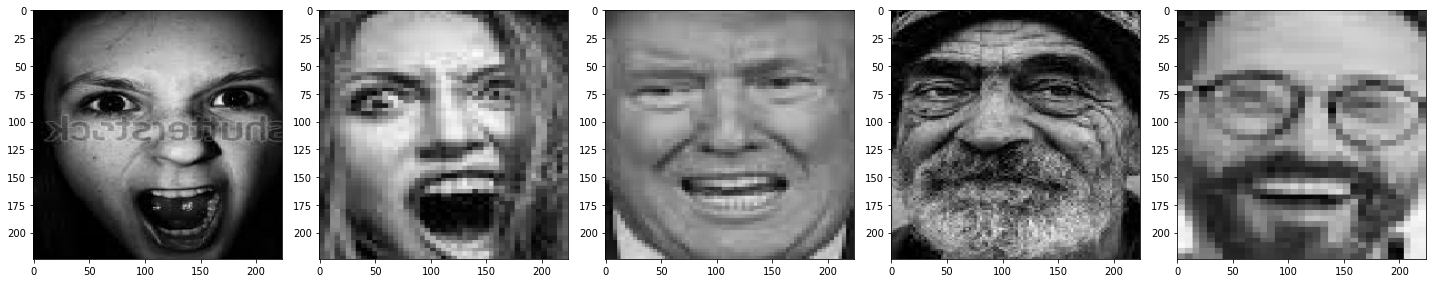

In [ ]:
sample,_=next(data_generator)
def plotImage(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
plotImage(sample[:5])

In [ ]:
model=tf.keras.Sequential([                           tf.keras.layers.Conv2D(128,(3,3),input_shape=(224, 224, 3)),
                           tf.keras.layers.MaxPool2D((2,2)),
                           tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                           tf.keras.layers.MaxPool2D((2,2)),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(1024,activation='relu'),
                           tf.keras.layers.Dense(516,activation='relu'),
                           tf.keras.layers.Dense(3,activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 111, 111, 128)    0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 186624)            0         
                                                                 
 dense_16 (Dense)            (None, 1024)             

In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),optimizer='adam',metrics=['accuracy'])
automatic_early_stop=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=4)
history=model.fit(data_generator, validation_data=test_data_generator, epochs=20,callbacks=automatic_early_stop)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


212/212 [==============================] - 729s 3s/step - loss: 1.3195 - accuracy: 0.4917 - val_loss: 1.0215 - val_accuracy: 0.4973
Epoch 2/20
212/212 [==============================] - 748s 4s/step - loss: 1.0287 - accuracy: 0.4994 - val_loss: 1.0285 - val_accuracy: 0.4956
Epoch 3/20
212/212 [==============================] - 749s 4s/step - loss: 1.0239 - accuracy: 0.5035 - val_loss: 1.0367 - val_accuracy: 0.4956
Epoch 4/20
212/212 [==============================] - 751s 4s/step - loss: 1.0849 - accuracy: 0.4935 - val_loss: 1.0370 - val_accuracy: 0.4991
Epoch 5/20
212/212 [==============================] - 760s 4s/step - loss: 1.0284 - accuracy: 0.4988 - val_loss: 1.0242 - val_accuracy: 0.4991
Epoch 6/20
212/212 [==============================] - 755s 4s/step - loss: 1.0313 - accuracy: 0.5006 - val_loss: 1.0246 - val_accuracy: 0.4991
Epoch 7/20
212/212 [==============================] - 754s 4s/step - loss: 1.0255 - accuracy: 0.4982 - val_loss: 1.0307 - val_accuracy: 0.4991


In [ ]:
model2=tf.keras.Sequential([
                           tf.keras.layers.Conv2D(256,(3,3),input_shape=(224, 224, 3)),
                           tf.keras.layers.MaxPool2D((2,2)),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(64,activation='relu'),
                           tf.keras.layers.Dropout(0.1),
                           tf.keras.layers.Dense(3,activation='softmax'),
])
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 256)    0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3154176)           0         
                                                                 
 dense (Dense)               (None, 64)                201867328 
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                        

In [ ]:
model2 = tf.keras.models.load_model('./my_model.h5',custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              60382697  
                                                                 
 dense (Dense)               (None, 256)               256512    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
Total params: 60,672,492
Trainable params: 289,795
Non-t

In [ ]:
import matplotlib.pyplot as plt 
import cv2

def test_model(image_path):
    test_image=cv2.imread(image_path)
    test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    fig=plt.figure(figsize=(10,5))
    plt.imshow(test_image)
    test_image=cv2.resize(test_image,(224,224))
    
    img_array = tf.keras.preprocessing.image.img_to_array(test_image)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    
    predictions = model2.predict(img_array)
    
    print("prediction : " + image_path + " "  ,class_list[np.argmax(predictions)])

prediction : ./valid/8.jpg  happiness
prediction : ./valid/14.jpeg  happiness
prediction : ./valid/12.jpg  happiness
prediction : ./valid/6.jpg  happiness
prediction : ./valid/5.jpg  happiness
prediction : ./valid/1.jpg  happiness
prediction : ./valid/3.jpg  happiness
prediction : ./valid/9.jpg  happiness
prediction : ./valid/11.jpg  happiness
prediction : ./valid/4.jpg  happiness
prediction : ./valid/10.jpg  happiness
prediction : ./valid/2.jpg  happiness
prediction : ./valid/7.jpg  happiness


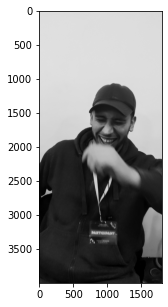

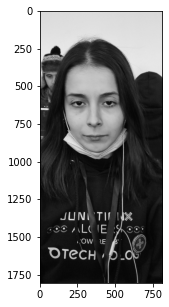

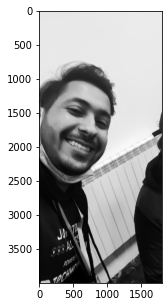

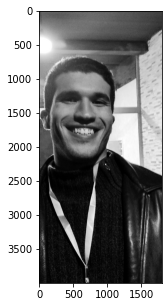

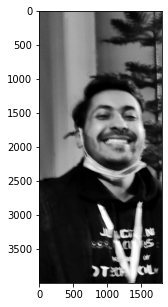

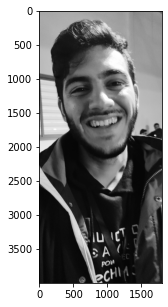

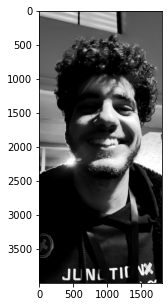

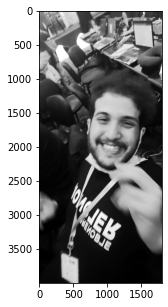

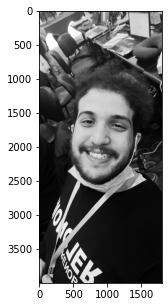

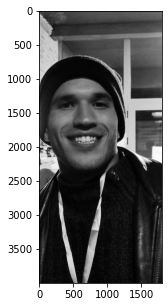

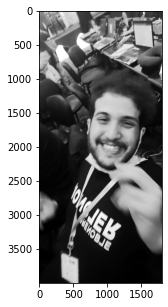

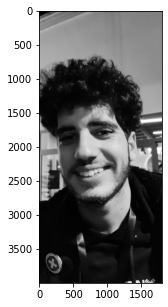

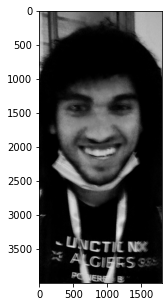

In [ ]:
for image in os.listdir('./valid'):
  if(image != ".ipynb_checkpoints"):
      test_model('./valid/'+image)

prediction : ./15.jpg  happiness


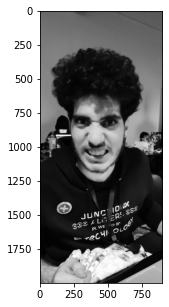

In [ ]:
test_model("./15.jpg")

In [ ]:
model3=tf.keras.Sequential([
    tf.keras.layers.Conv2D(96,(3,3),input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(96,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(48,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(24,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3,activation='softmax')
                           ])

In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 96)      2688      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 96)      83040     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 96)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 48)      41520     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 48)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 24)        1